In [2]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


# Other Libraries
#from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings("ignore")


## Dataset Analysis

In [3]:
# Load dataset
df = pd.read_csv("fraud_prep.csv")

# First 5 features
df.head()

# Dataset features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
# summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# count the occurrences of fraud and no fraud cases
print("Class types: 0 non-fraud, 1 fraud")
print(df["Class"].value_counts())

# Normalize target for training
print("Ratio of class types: 0 non-fraud, 1 fraud")
print(df["Class"].value_counts(normalize=True))

Class types: 0 non-fraud, 1 fraud
0    284315
1       492
Name: Class, dtype: int64
Ratio of class types: 0 non-fraud, 1 fraud
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [6]:
# Check if any missing value
df.isnull().sum()

# Conclusion: no null value, i.e., no need to fill/drop NaN

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Dataset SUMMARY: very in-balanced classes, i.e., many non-fraud and a few fraud classes.

## Overview of fraud transaction analysis
In banking or credit payment industry, the standard way is to use statistical approach to identify an "optimal" statistics threshold to separate fraud transactions and non-fraud transactions. 

A common used approach to find such threhold is to find the mean of the sample transactions. 

In [7]:
# Find the mean of features for each class group
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [8]:
# Now use V1 < -3 and V2 > 2 as threshold to identify the fraud transactions
df['fraud_flagged'] = np.where(np.logical_and(df['V1']<-3, df['V2']>2), 1,0)
ct=pd.crosstab(df.Class, df.fraud_flagged, rownames=["Fraud_actual"], colnames=["Fraud_flagged"])

print("**** Fraud_actual vs Fraud_flagged ****")
print(ct)

print("**** Fraud_actual vs Fraud_flagged (%) ****")
print(ct.apply(lambda r: r/r.sum()*100, axis=1))

**** Fraud_actual vs Fraud_flagged ****
Fraud_flagged       0     1
Fraud_actual               
0              278946  5369
1                 316   176
**** Fraud_actual vs Fraud_flagged (%) ****
Fraud_flagged          0          1
Fraud_actual                       
0              98.111602   1.888398
1              64.227642  35.772358


#### SUMMARY: 35.77% fraud transactions are identified, however, 64.22% are not identified. 1.88% non-fraud transactions are flagged as fraud.


## Supervised Learning
### Data pre-processing

In [9]:
# Drop columns/features
X = df.drop(["Time", "Class", "fraud_flagged"], axis=1)
y = df["Class"]

# Create training and test sets using random split
# Note that, we can also use CV, shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Logistic Regression

In [10]:
# Training model
clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Get prediction on test set
prediction  = clf.predict(X_test)
proba       = clf.predict_proba(X_test)
print("Accuracy score: ", accuracy_score(y_test,prediction))

Accuracy score:  0.999283727985169


In [12]:
# Print ROC and Confusion Matrix
# print the ROC score
print("ROC score: {}\n".format(roc_auc_score(y_test, proba[:,1])))

print("Stats report:\n{}\n".format(classification_report(y_test, prediction)))

# print confusion matrix
cfm = confusion_matrix(y_true=y_test, y_pred=prediction)
print("Confusion matrix:\n{}\n".format(cfm))

ROC score: 0.9741287058139425

Stats report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.88      0.67      0.76       120

    accuracy                           1.00     71202
   macro avg       0.94      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202


Confusion matrix:
[[71071    11]
 [   40    80]]



* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

* The support is the number of occurrences of each class in y_true.

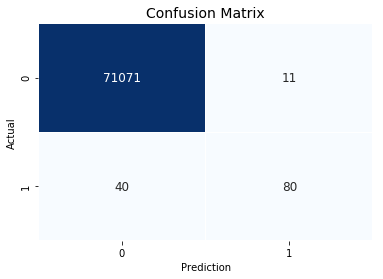

In [13]:
#plot the confusion matrix
sns.heatmap(cfm, annot=True, annot_kws={"size":12}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion Matrix", fontsize=14)
plt.ylabel("Actual", fontsize=10)
plt.xlabel("Prediction", fontsize=10)
plt.show()

#### Summary: 40 false negatives, 11 false positives, 80 out of 120 (67%)  fraud are flagged. 

### Data Resampling
As shown above, the dataset is highly inbalanced. With a more balanced dataset, let us test if we can improve the performance.

We can either undersampling non-fraud cases (losing data) or oversampling fraud cases (duplicates). 

SMOTE (oversampling method) is used to create synthetic data. Instead of copying duplicated data, SMOTE uses nearest neighbor characteristics to create synthetic fraud cases. SMOTE works well when the fraud cases nearest neighbors show distinct characteristics. 

In [14]:
# Define the resampling method
resample_method = SMOTE()
X_resampled, y_resampled = resample_method.fit_sample(X_train, y_train)

# check before and after resample
print("Before resampling:\n{}\n".format(y_train.value_counts()))
print("After resampling:\n{}\n".format(pd.Series(y_resampled).value_counts()))

Before resampling:
0    213233
1       372
Name: Class, dtype: int64

After resampling:
1    213233
0    213233
dtype: int64



### Train model with resampled dataset

In [15]:
# Training model
clf = LogisticRegression(solver="liblinear")
clf.fit(X_resampled, y_resampled)

# Get prediction on test set
prediction  = clf.predict(X_test)
prob       = clf.predict_proba(X_test)
print("Accuracy score: ", accuracy_score(y_test,prediction))

# Print ROC and Confusion Matrix
# print the ROC score
print("ROC score (resampled): {}\n".format(roc_auc_score(y_test, prob[:,1])))

print("Stats report (resampled):\n{}\n".format(classification_report(y_test, prediction)))

# print confusion matrix
cfm = confusion_matrix(y_true=y_test, y_pred=prediction)
print("Confusion matrix (resampled):\n{}\n".format(cfm))

Accuracy score:  0.9830763180809527
ROC score (resampled): 0.9763196027123604

Stats report (resampled):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.08      0.89      0.15       120

    accuracy                           0.98     71202
   macro avg       0.54      0.94      0.57     71202
weighted avg       1.00      0.98      0.99     71202


Confusion matrix (resampled):
[[69890  1192]
 [   13   107]]



#### SUMMARY: 106 out of 120 fraud transactions are flagged. However, we have an increase false positive 11 -> 1190, meaning more non-fraud transactions flagged as fraud. This is likely because the fraud case scattered over the dataset and introduced some noise, i.e., nearest neighbors not necessarily are fraud transactions.

### Random Forest

# ADD COMMENTS
Random forest has a built-in mode to deal with inbalanced dataset. The balanced* mode adjusts weights inversely proportional to the class frequence in the input data as num_samples/(np.bincount(y) * num_classes)

The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). 

### Train Random Forest with normal dataset

In [16]:
%%time
# define the model as the random forest
clf = RandomForestClassifier(class_weight="balanced_subsample", random_state=0)

# fit the model to our training set
clf.fit(X_train, y_train)

# obtain predictions from the test data 
prediction = clf.predict(X_test)

# predict probabilities
prob = clf.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, prediction)))
print("ROC score = {}\n".format(roc_auc_score(y_test, prob[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, prediction)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, prediction)))

Accuracy Score: 0.9995084407741356

ROC score = 0.9206149822270993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.95      0.75      0.84       120

    accuracy                           1.00     71202
   macro avg       0.97      0.87      0.92     71202
weighted avg       1.00      1.00      1.00     71202


Confusion Matrix:
[[71077     5]
 [   30    90]]

CPU times: user 9.55 s, sys: 126 ms, total: 9.67 s
Wall time: 9.78 s


### Train Random Forest with Resampled dataset

In [17]:
%%time
# Training model
# The "balanced" mode uses the values of y to automatically adjust weights 
# inversely proportional to class frequencies in the input data as 
# n_samples / (n_classes * np.bincount(y)).
clf = RandomForestClassifier(class_weight="balanced_subsample", random_state=0)
clf.fit(X_resampled, y_resampled)

# Get prediction on test set
prediction  = clf.predict(X_test)
prob       = clf.predict_proba(X_test)
print("Accuracy score: ", accuracy_score(y_test,prediction))

# Print ROC and Confusion Matrix
# print the ROC score
print("ROC score (resampled): {}\n".format(roc_auc_score(y_test, prob[:,1])))

print("Stats report (resampled):\n{}\n".format(classification_report(y_test, prediction)))

# print confusion matrix
cfm = confusion_matrix(y_true=y_test, y_pred=prediction)
print("Confusion matrix (resampled):\n{}\n".format(cfm))

Accuracy score:  0.9995505744220669
ROC score (resampled): 0.9523132907534021

Stats report (resampled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.89      0.84      0.86       120

    accuracy                           1.00     71202
   macro avg       0.94      0.92      0.93     71202
weighted avg       1.00      1.00      1.00     71202


Confusion matrix (resampled):
[[71069    13]
 [   19   101]]

CPU times: user 32.2 s, sys: 245 ms, total: 32.4 s
Wall time: 29.4 s


#### SUMMARY:  for resampled dataset, RandomeForest shows similar true positives to LogisticRegression102 (RF) vs 120(LR). RandomForest  does not misclassify as many as non-fraud cases as fraud 16 (RF) vs 1190 (LR)

### GridSearchCV for optimal parameters
For the classifier parameters, so far default values are mostly applied. We can manually set which scores carry more importance using GridSearchCV to find the optimal params. For fraud detection, we would rather prefer a better recall score (i.e., detect as many as fraud cases at cost of misclassifying non-fraud to fraud). We can also ajust F-score to reduce false positives (i.e., improved precision). 

Goal is to find optimal recall-precision balance.

In [ ]:
%%time

# Define the parameter sets to test
param_grid = {"n_estimators": [10, 50], 
              "max_features": ["auto", "log2"],  
#               "min_samples_leaf": [1, 10],
              "max_depth": [4, 8], 
              "criterion": ["gini", "entropy"], 
              "class_weight": [None, {0:1, 1:12}]
}

# define the model to use
model = RandomForestClassifier(random_state=0)

# combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="recall", n_jobs=-1)

# fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)

In [ ]:
%%time

clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

In [ ]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)



In [ ]:
predictions = clf.predict(X_test)

# predict probabilities
probs = CV_model.predict_proba(X_test)

print(accuracy_score(y_test, predictions))

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predictions)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predictions)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predictions)))

### Decision Tree
Decision tree tends to overfit on data with large number of features. We can apply feature selection or PCA/ICA beforehand to find discriminative features

In [ ]:
# Balanced mode used
clf = DecisionTreeClassifier()
print(cfl.get_params)